# Julia does interactive numerics like Matlab

Interactive numerical and graphical computation, plus
  * familiar syntax, improved
  * rich numeric types: rational numbers, arbitrary-precision numbers
  * metaprogramming: transforming then evaluating chunks of code
  * Unicode variables and source text: $\alpha \; \beta \; \gamma \; \aleph \; x_j \; A_{ij} \; \oplus \; \ldots$
  * notebook interface with embedded graphics and LaTeX: $\text{erf}(x) = \pi^{-1/2} \int_{-x}^x e^{-t^2} dt$
 

In [1]:
using PyPlot
using ODE

## Solving Ax=b with backslash operator

In [2]:
# random matrix with normally distributed elements
A = randn(4,4)

4×4 Array{Float64,2}:
  2.32529    0.492914   -0.913207   0.335612
 -1.17931   -1.35425     0.596715   1.04283 
 -0.680987   0.0101153   0.70889   -0.186733
 -1.72136    0.429634   -1.58448   -0.478643

In [3]:
# familiar colon syntax: get 1st col of A
a₁ = A[:,1]

4-element Array{Float64,1}:
  2.32529 
 -1.17931 
 -0.680987
 -1.72136 

In [4]:
# set up Ax=b problem with known solution x
x = randn(4)
b = A*x

4-element Array{Float64,1}:
 -0.913026
 -0.105773
  0.891713
 -2.09624 

In [5]:
# compute numerical solution x̂ of Ax=b using backslash operator
x̂ = A\b

4-element Array{Float64,1}:
  0.199729  
  0.00770878
  1.29055   
 -0.604012  

In [6]:
# compute error
@show norm(A*x̂ - b)    # @show macro: print expression = <value of expression>

norm(A * x̂ - b) = 1.9229626863835638e-16


In [7]:
# what is machine precision for Float64 type?
eps(Float64)

2.220446049250313e-16

In [8]:
# compute condition number of A
cond(A)

27.52128206444359

## SVD and eigenvalues

In [9]:
U, σ, V = svd(A);
@show σ;

σ = [3.29537, 2.36596, 1.29689, 0.119739]


In [10]:
m = 32
λ = eigvals(randn(m,m)/sqrt(m))

32-element Array{Complex{Float64},1}:
    1.02349+0.0im     
   0.777527+0.507211im
   0.777527-0.507211im
  -0.933476+0.0im     
  -0.737289+0.480235im
  -0.737289-0.480235im
  -0.491405+0.667424im
  -0.491405-0.667424im
   0.348092+0.747129im
   0.348092-0.747129im
  -0.259015+0.743755im
  -0.259015-0.743755im
 -0.0702401+0.667072im
           ⋮          
    0.24538-0.585751im
  -0.375924+0.0im     
   0.472808+0.411244im
   0.472808-0.411244im
  -0.106955+0.0im     
   0.510071+0.227806im
   0.510071-0.227806im
   0.504055+0.0im     
   0.317106+0.164941im
   0.317106-0.164941im
   0.209176+0.131656im
   0.209176-0.131656im

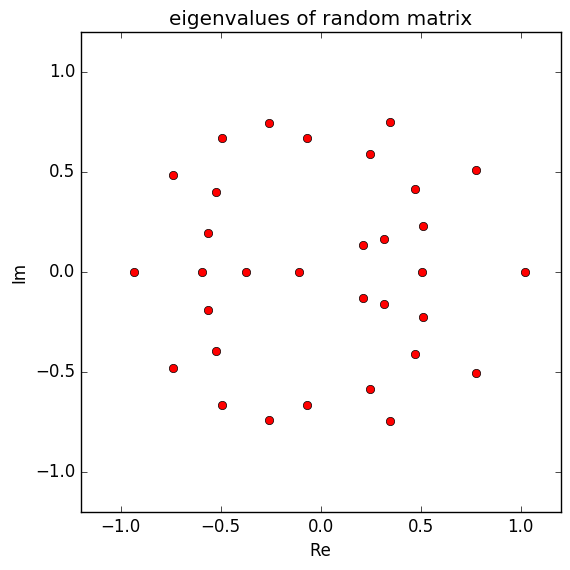

In [11]:
plot(real(λ), imag(λ), "ro")
xlabel("Re")
ylabel("Im")
axis("square")
title("eigenvalues of random matrix")
xlim(-1.2,1.2)
ylim(-1.2,1.2);

## Integrate Lorenz equations

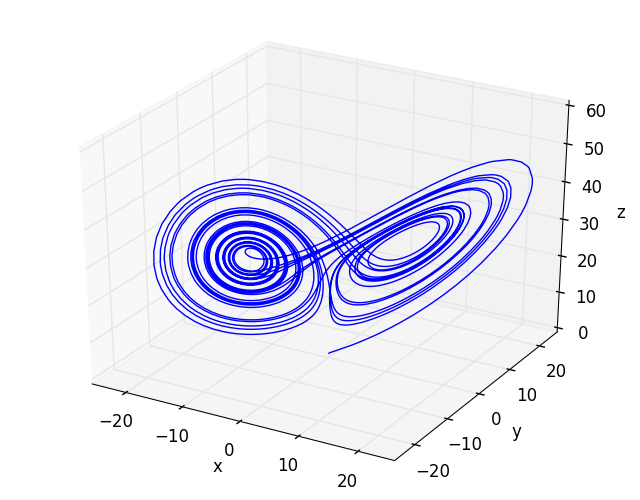

In [12]:
# define Lorenz equations ẋ = f(t,x)
function f(t, x)
    σ = 10
    β = 8/3
    ρ = 28
    [σ*(x[2]-x[1]); x[1]*(ρ-x[3]); x[1]*x[2] - β*x[3]]
end

# integrate ẋ = f(t,x) numerically from t=0 to t=21
t = 0:0.01:30.0
x₀ = [0.1; 0.0; 0.0]
t,x = ode45(f, x₀, t)

x = hcat(x...)'         # rearrange storage of x (don't ask...)

# plot trajectory x(t)
plot3D(x[:,1], x[:,2], x[:,3], "b-")
xlabel("x")
ylabel("y")
zlabel("z")
xlim(-25,25)
ylim(-25,25)
zlim(0,60)
;

## Function definitions: one-liners

In [13]:
f(x) = x^2 - 3                   # one-line function defn

for x ∈ linspace(-1, 1, 11)
    println("f($x) = $(f(x))")   # string interpolation
end

f(-1.0) = -2.0
f(-0.8) = -2.36
f(-0.6) = -2.64
f(-0.4) = -2.84
f(-0.2) = -2.96
f(0.0) = -3.0
f(0.2) = -2.96
f(0.4) = -2.84
f(0.6) = -2.64
f(0.8) = -2.36
f(1.0) = -2.0


In [14]:
fib(n) = n < 2 ? 1 : fib(n-1) + fib(n-2)  # recursive fibonacci function

for n ∈ 0:10
    println("fib($n) = $(fib(n))")        # string interpolation
end

fib(0) = 1
fib(1) = 1
fib(2) = 2
fib(3) = 3
fib(4) = 5
fib(5) = 8
fib(6) = 13
fib(7) = 21
fib(8) = 34
fib(9) = 55
fib(10) = 89


In [15]:
⊕ = (x,y) -> 3x + y   #  unicode operator defined with anonymous function

3+4im ⊕ 4//5          # Complex{Int64} ⊕ Rational{Int64} → Complex{Rational{Int64}}

49//5 + 12//1*im

In [16]:
typeof(ans)

Complex{Rational{Int64}}

## Free, open, and internet-enabled

May the source be with you

In [17]:
@which A\b

\(A::AbstractArray{T,2} where T, B::Union{AbstractArray{T,1}, AbstractArray{T,2}} where T) in Base.LinAlg at linalg/generic.jl:805

In [18]:
@which ode45(f, x₀, t)

ODE.ode45(fn, y0, tspan) in ODE at /home/gibson/.julia/v0.6/ODE/src/runge_kutta.jl:219

In [19]:
@which cond(A)

cond(A::AbstractArray{T,2} where T) in Base.LinAlg at linalg/dense.jl:911